# Project 3 Tartans

# Introduction

This project is primarily about creating Tartans which is a traditional Scottish fabric pattern that has matching patterns of the horizontal and vertical stripes. In the context of this project the dimensions of the tartan which $n X n$ meaning that the end resulting should be a square pattern. Each of use is given a pattern and a list of three numbers for each of the colors included in our tartan. In my case, I was assigned MacLeod of Lewis (28) that has the following pattern: $K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16$. The color definition of each color is given as the following for me: $K : [16, 16, 16], R : [200, 0, 0], Y : [216, 176, 0]$.
The goal of this project is to create a code that is comprehensive and proficiently recreates the tartan that was assigned to each of us.

In [91]:
50306828%31

28

### MacLeod of Lewis (28)

In [92]:
import numpy as np
import matplotlib.pyplot as plt

In [93]:
def deconstruction(pattern):                   # deconstruction code shown in class                 
    string_list = pattern.split()
    pattern_list = []
    pattern_final = []
    for string in string_list:
        value =''                              # values represents the length/width of the color strip
        key =''                                # keys represent color letter i.e. K, Y or R
        for character in string:
            if character in ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']:
                value = value + character
            else:
                key = key + character
        pattern_final.append((key, int(value)))
    return pattern_final                     # output a list of tuples that contains the keys and the value associated with it

### Example

In [94]:
deconstruction('K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16')

[('K', 16),
 ('Y', 4),
 ('K', 32),
 ('Y', 48),
 ('R', 4),
 ('Y', 48),
 ('K', 32),
 ('Y', 4),
 ('K', 16)]

In [95]:
def KRYband(color_letter, length ,width, n):
    color_dic = {'K': np.array([16, 16, 16])/255, 'R': np.array([200, 0, 0])/255, 'Y': np.array([216, 176, 0])/255}
    color = color_dic[color_letter]                                     # color tones are being established
    color_band = np.zeros((n,n,3))
    color_band[length:width,:,0] = np.ones((width-length,n))*color[0]   # horizontal color stripes are being made
    color_band[length:width,:,1] = np.ones((width-length,n))*color[1]
    color_band[length:width,:,2] = np.ones((width-length,n))*color[2]
    color_band[:,length:width,0] = np.ones((n,width-length))*color[0]   # vertical color stripes are being made
    color_band[:,length:width,1] = np.ones((n,width-length))*color[1]
    color_band[:,length:width,2] = np.ones((n,width-length))*color[2]
    return color_band

In [96]:
def parts(n):
                                           
    pattern = 'K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16 '
    
    
    total_len = 0                                        
    for i in deconstruction(pattern):
        total_len = total_len +i[1]                      # total length of the pattern
    times = n // total_len                               # how any complete pattern as with the dimensions 
    remainder = n % total_len
    pattern = pattern * times
    list_len = [16, 4, 32, 48, 4, 48, 32, 4, 16]
    list_pattern = ['K16', 'Y4', 'K32', 'Y48', 'R4', 'Y48', 'K32', 'Y4', 'K16']
    counter = 0
    for d in list_pattern:                  # accounts for the remaining partial pattern
        if remainder >= list_len[counter]:
            pattern = pattern + d + " "
            remainder = remainder - list_len[counter]
            counter = counter + 1
    list1 = []
    num = 0
    for i in deconstruction(pattern): 
        tup = (i[0], num, num+i[1])       # each tuple includes letter of color and the range for the length and width 
        num =num + i[1]
        list1.append(tup)
    return list1

### Examples of how the code functions

In [97]:
parts(52)

[('K', 0, 16), ('Y', 16, 20), ('K', 20, 52)]

In [98]:
parts(204) 

[('K', 0, 16),
 ('Y', 16, 20),
 ('K', 20, 52),
 ('Y', 52, 100),
 ('R', 100, 104),
 ('Y', 104, 152),
 ('K', 152, 184),
 ('Y', 184, 188),
 ('K', 188, 204)]

In [99]:
parts(407)

[('K', 0, 16),
 ('Y', 16, 20),
 ('K', 20, 52),
 ('Y', 52, 100),
 ('R', 100, 104),
 ('Y', 104, 152),
 ('K', 152, 184),
 ('Y', 184, 188),
 ('K', 188, 204),
 ('K', 204, 220),
 ('Y', 220, 224),
 ('K', 224, 256),
 ('Y', 256, 304),
 ('R', 304, 308),
 ('Y', 308, 356),
 ('K', 356, 388),
 ('Y', 388, 392)]

In [100]:
parts(408)

[('K', 0, 16),
 ('Y', 16, 20),
 ('K', 20, 52),
 ('Y', 52, 100),
 ('R', 100, 104),
 ('Y', 104, 152),
 ('K', 152, 184),
 ('Y', 184, 188),
 ('K', 188, 204),
 ('K', 204, 220),
 ('Y', 220, 224),
 ('K', 224, 256),
 ('Y', 256, 304),
 ('R', 304, 308),
 ('Y', 308, 356),
 ('K', 356, 388),
 ('Y', 388, 392),
 ('K', 392, 408)]

In [101]:
def show_tartan(n):
    K = 0                                       # initialization
    R = 0
    Y = 0
    
    for i in parts(n):                          # compiles the bands based on color
        if i[0] == 'K':
            K = K + KRYband(i[0],i[1],i[2], n)
        elif i[0] == 'R':
            R = R + KRYband(i[0],i[1],i[2], n)
        else:
            Y = Y + KRYband(i[0],i[1],i[2], n)
        
    plt.imshow(K + Y + R)                      # combines the images of each color
    
    


### Important

The best patterns are these that have $n$ values that are greater then 200 and for the best scaled tartans make $n$ a factor of 204 (which is the full length of one pattern). If you input a $n$ value that is not a factor of 204 it will still make the pattern up to the length $n$ as shown by $show$_$tartan(500)$ below.

### Examples

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


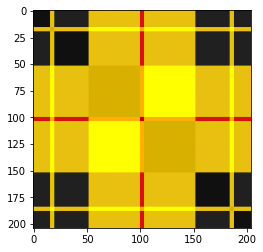

In [102]:
show_tartan(204) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


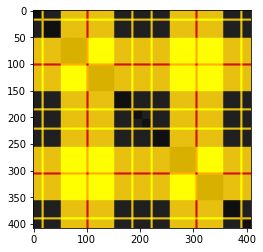

In [103]:
show_tartan(408) 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


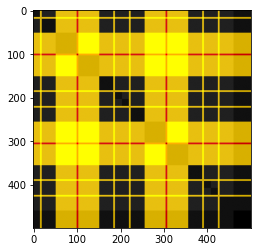

In [104]:
show_tartan(500)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


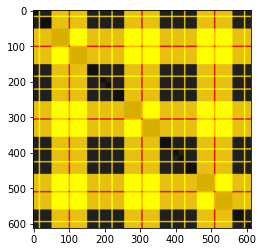

In [105]:
show_tartan(612)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


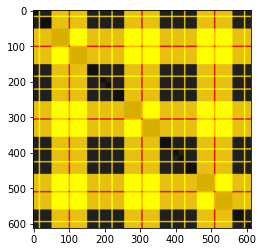

In [106]:
show_tartan(612)

# Conclusion

When creating the code that will display horizontal and vertical stripes according to the pattern given many things need to be accounted for. The length and width of each of the horizontal and vertical stripes are given by the number that follows after each letter that represents the color of the stripe in the pattern. The horizontal pattern should look exactly like the vertical pattern just rotated. The function $show$_$tartan(n)$ measured the dimension of the final tartan and created a square that was filled in by the pattern. The function first fills in the complete tartan patterns and then later accounts for partial patterns. The best patterns are these that have a $n$ value which is a factor of 204 (which is the full length of one pattern). If you input a $n$ value that is not a factor of 204 it will still make the pattern up to the length $n$ as shown by $show$_$tartan(500)$ above. 

Overall, the project taught us how to use trial and error to create our tartan pattern based on the requirements of the assignment. After I was done with the project I went back and made by code more understandable and I had improved it so it took less time and the code became more efficient. 

# Bonus

In [107]:
def letters1(color_dictionary):
    counter = -1 
    for i in color_dictionary.keys():
        counter =counter +1 
        if counter == 0:
            a = i   
    return a

In [108]:
def letters2(color_dictionary):
    counter = -1 
    for i in color_dictionary.keys():
        counter =counter +1 
        if counter == 1:
            b = i   
    return b

In [109]:
def letters3(color_dictionary):
    counter = -1 
    for i in color_dictionary.keys():
        counter =counter +1 
        if counter == 2:
            c = i   
    return c

In [110]:
letters1({'K': [16, 16, 16], 'R': [200, 0, 0], 'Y': [216, 176, 0]})

'K'

In [111]:
letters2({'W' : [240, 224, 200], 'RB' : [28, 0, 112], 'K' : [16, 16, 16] })

'RB'

In [112]:
letters3({'A' : [92, 140, 168], 'P' : [120, 0, 120], 'G': [0, 104, 24] })

'G'

In [113]:
def KRYband_Bonus(color_letter, length ,width, color_dictionary ,n):
    color_dic = {letters1(color_dictionary): np.array(color_dictionary[letters1(color_dictionary)])/255, letters2(color_dictionary): np.array(color_dictionary[letters2(color_dictionary)])/255, letters3(color_dictionary): np.array(color_dictionary[letters3(color_dictionary)])/255}
    color = color_dic[color_letter]                                     # color tones are being established
    color_band = np.zeros((n,n,3))
    color_band[length:width,:,0] = np.ones((width-length,n))*color[0]   # horizontal color stripes are being made
    color_band[length:width,:,1] = np.ones((width-length,n))*color[1]
    color_band[length:width,:,2] = np.ones((width-length,n))*color[2]
    color_band[:,length:width,0] = np.ones((n,width-length))*color[0]   # vertical color stripes are being made
    color_band[:,length:width,1] = np.ones((n,width-length))*color[1]
    color_band[:,length:width,2] = np.ones((n,width-length))*color[2]
    return color_band



In [114]:
def parts_Bonus(n, string):                             # added a string variable
                                           
    pattern = string + ' '                              # pattern will be gotten from the input
    
    
    total_len = 0                                        
    for i in deconstruction(pattern):
        total_len = total_len +i[1]                      # total length of the pattern
    times = n // total_len                               # how any complete pattern as with the dimensions 
    remainder = n % total_len
    pattern = pattern * times
    
    list1 = []
    num = 0
    for i in deconstruction(pattern): 
        tup = (i[0], num, num+i[1])       # each tuple includes letter of color and the range for the length and width 
        num =num + i[1]
        list1.append(tup)
    return list1

In [115]:
def bonus(n, color_dictionary, string):
    K = 0                                       # initialization
    R = 0
    Y = 0
    
    for i in parts_Bonus(n, string):                          # compiles the bands based on color
        if i[0] == letters1(color_dictionary):
            K = K + KRYband_Bonus(i[0],i[1],i[2], color_dictionary, n)
        elif i[0] == letters2(color_dictionary):
            R = R + KRYband_Bonus(i[0],i[1],i[2], color_dictionary, n)
        elif i[0] == letters3(color_dictionary):
            Y = Y + KRYband_Bonus(i[0],i[1],i[2], color_dictionary, n)
            
    plt.imshow(K + Y + R)                      # combines the images of each color
   
    

### Code limitations

This bonus was specificly made to represent the pattern of MacLeod of Lewis (28) which I was assigned and is the first example below. However, this code also works for other patterns as shown in the second example onwards below, this is were some of the restrictions come in to play, the function $bonus$ will only make patterns involving only three colors which is exactly how much is included in the MacLeod of Lewis pattern. Any color code can be used, but only the first three enties of the dictionary will be read.

## MacLeod of Lewis (28)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


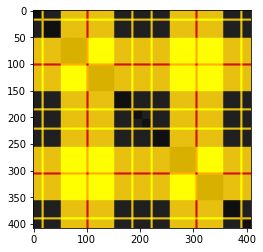

In [116]:
bonus(408, {'K': [16, 16, 16], 'R': [200, 0, 0], 'Y': [216, 176, 0]},'K16 Y4 K32 Y48 R4 Y48 K32 Y4 K16' )

## Lang (14)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


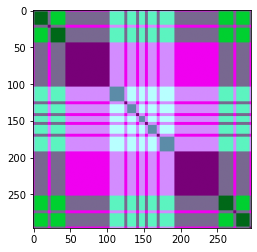

In [117]:
bonus(296, {'A' : [92, 140, 168], 'P' : [120, 0, 120], 'G': [0, 104, 24] }, 'P2 G18 P4 G20 P60 A20 P4 A12 P4 A8 P4 A12 P4 A20 P60 G20 P4 G18 P2')

## Ailsa Navy (27)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


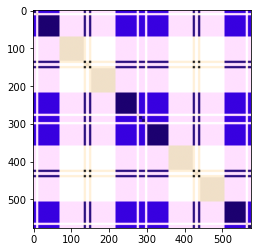

In [118]:
bonus(576, {'W' : [240, 224, 200], 'RB' : [28, 0, 112], 'K' : [16, 16, 16] }, 'RB8 W6 RB56 W64 K6 W8 K6 W64 RB56 W6 RB8')

In [ ]:
A = show_tartan(204) 
plt.imsave('iffatcho_50306828%31.png', A)